# Практическое занятие №3. Линейные модели

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Реализация аналитического решения и сравнение с sklearn. Базовый случай с 1 признаком

In [4]:
# сгенерируем простой датасет с одним признаком
n_objects = 100

linear_func = lambda x:  3.2 * x + 8

X = np.linspace(-10, 10, n_objects)
y = linear_func(X) + np.random.randn(n_objects) * 5

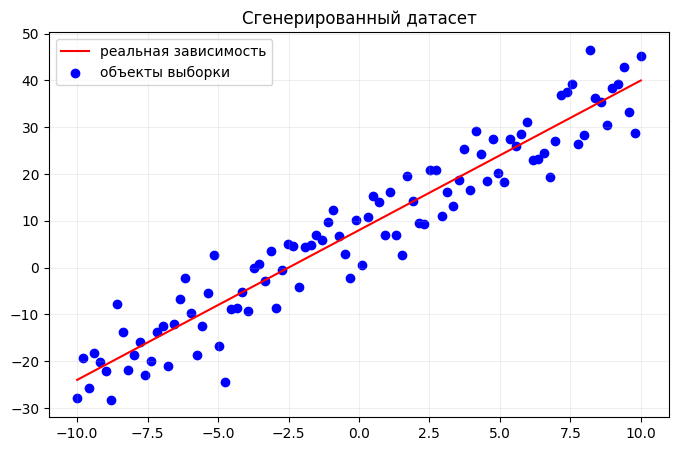

In [5]:
# посмотрим на датасет
plt.figure(figsize=(8, 5))
plt.plot(X, linear_func(X), label='реальная зависимость', c='red')
plt.scatter(X, y, label='объекты выборки', c='b')

plt.title("Сгенерированный датасет")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

**Напоминание**

Модель линейной регрессии $f(X)$
$$f(X) = Xw$$

Функция риска
$$Q(X) = |y - Xw|^2$$

Аналитическое решение 
$$w^* = (X^TX)^{-1}X^Ty$$

In [6]:
# класс линейной регрессии с помощью аналитического решения
class DummyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        """
        фукнкция обучения - вычисляет параметры модели (веса) по данной выборке
        
        Inputs:
        X - матрица признаков
        y - вектор ответов
        
        Outputs:
        self - модель
        """
        
        # < напишите код здесь > 
        return self
        
    def predict(self, X):
        """
        функция предсказания - предсказывает ответы модели по данной выборке
        
        Inputs:
        X - матрица признаков
        
        Outputs:
        y_pred - предсказания
        """
        
        # < напишите код здесь > 

        return y_pred
    
    def get_weights(self):
        return self.w

In [7]:
# разделим датасет на обучающую и тестовую выборки 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

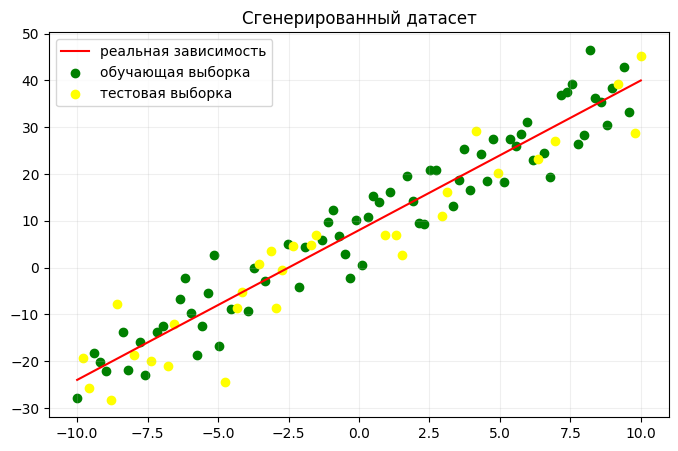

In [8]:
# посмотрим на выборки
plt.figure(figsize=(8, 5))
plt.plot(X, linear_func(X), label='реальная зависимость', c='red')
plt.scatter(X_train, y_train, label='обучающая выборка', c='g')
plt.scatter(X_test, y_test, label='тестовая выборка', c='yellow')

plt.title("Сгенерированный датасет")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [9]:
# X_train и X_test - должны быть матрицами! признаков
print(X_train.shape)
print(X_train[:, np.newaxis].shape)

(70,)
(70, 1)


In [10]:
# тестируем нашу модель
custom_linear_regressor = DummyLinearRegression()

custom_linear_regressor.fit(X_train[:, np.newaxis], y_train)

custom_predictions = custom_linear_regressor.predict(X_test[:, np.newaxis])
w = custom_linear_regressor.get_weights()

print(w)

NameError: name 'y_pred' is not defined

In [ ]:
# тестируем модель из коробки - sklearn
# документация https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

from sklearn.linear_model import LinearRegression

# sklearn_linear_regressor = # < напишите код здесь > 

sklearn_linear_regressor.fit(X_train[:, np.newaxis], y_train)

# sklearn_predictions = # < напишите код здесь > 

w_0 = # < напишите код здесь > 
w_1 = # < напишите код здесь > 

# print(w)

In [ ]:
w_0, w_1

In [ ]:
# нарисуем модели
plt.figure(figsize=(8, 5))
plt.plot(X, linear_func(X), label='реальная зависимость', c='g')

plt.scatter(X_test, y_test, label='тестовая выборка', c='yellow')

plt.plot(X_test, custom_predictions, label='предсказанная зависимость', c='blue', linestyle=':')
plt.plot(X_test, sklearn_predictions, label='предсказанная зависимость', c='red', linestyle=':')

plt.title("Предсказанная зависимость")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

## Скоррелированные признаки. Регуляризация

In [ ]:
n_features = 3
n_objects = 300

eps = 1e-3

X = np.random.uniform(-5, 5, (n_objects, n_features))

# сделаем 2ой и 3и1 признак сильно скоррелированными
X[:, -1] = X[:, -2] + np.random.uniform(-eps, eps, X[:, -2].shape)

NameError: name 'np' is not defined

In [ ]:
X

In [ ]:
# смотрим на признаки
plt.figure(figsize=(12, 6))

plt.subplot(231)
plt.hist(X[:, 0], 15, density=True, color='orange')
plt.title('1ый признак')

plt.subplot(232)
plt.hist(X[:, 1], 15, density=True, color='green')
plt.title('2ой признак')

plt.subplot(233)
plt.hist(X[:, 2], 15, density=True)
plt.title('3ий признак')

plt.show()

In [ ]:
# реальный вектор весов
w_true = np.random.normal(size=(n_features + 1, ))
w_true[0] = 0

y = np.hstack((np.ones((n_objects, 1)), X)).dot(w_true) + np.random.normal(0, 1, (n_objects))

w_true

In [ ]:
# предсказанный вектор весов
custom_linear_regressor = DummyLinearRegression().fit(X, y)

custom_linear_regressor.get_weights()

**Напоминание**

Функция риска с L2 регуляризацией
$$Q(X) = |y - Xw|^2 + \lambda^2|w|^2$$

Аналитическое решение с L2 регуляризацией
$$\hat{w} = (X^TX + \lambda^2E)^{-1}X^Ty$$

In [ ]:
# класс линейной регрессии с помощью аналитического решения c регуляризацией
class DummyLinearRegressionWithRegularization(DummyLinearRegression):
    def __init__(self, fit_intercept=True):
        super().__init__(fit_intercept)

    def fit_with_l2(self, X, y):
        """
        функция обучения - вычисляет параметры модели (веса) по данной выборке, c учетом регуляризации
        
        Inputs:
        X - матрица признаков
        y - вектор ответов
        
        Outputs:
        self - модель
        """
        
        # < напишите код здесь > 

        return self

In [ ]:
# предсказанный вектор весов с регуляризацией
custom_linear_regressor = DummyLinearRegressionWithRegularization().fit_with_l2(X, y)

custom_linear_regressor.get_weights()

In [ ]:
w_true

## Решаем настоящую задачу

In [ ]:
# о датасете https://archive.ics.uci.edu/ml/datasets/Automobile

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", \
                    header=None, na_values=["?"])

In [ ]:
headers=["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels",
        "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders",
         "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg",
         "highway-mpg", "price"]

In [ ]:
df.columns = headers

In [ ]:
df.head()

### Смотрим на данные

In [ ]:
df.info()

In [ ]:
# распределение числовой фичи
plt.figure(figsize=(5, 3))
plt.hist(df["price"], bins=10)
plt.show()

In [ ]:
# соотношение таргета и разных числовых фичей
plt.figure(figsize=(15, 7))

plt.subplot(231)
plt.scatter(df["horsepower"], df["price"])
plt.title("Price vs Housepower")

plt.subplot(232)
plt.scatter(df["peak-rpm"], df["price"])
plt.title("Price vs peak-rpm")

plt.subplot(233)
plt.scatter(df["highway-mpg"], df["price"])
plt.title("Price vs highway-mpg")

plt.subplot(234)
plt.scatter(df['curb-weight'], df["price"])
plt.title("Price vs curb-weight")

plt.show()

NameError: name 'plt' is not defined

In [ ]:
# распределение категорийных фичей
plt.figure(figsize = (20,10))

plt.subplot(231)
plt.pie(df['body-style'].value_counts(), labels = df['body-style'].value_counts().index, autopct = '%1.2f%%')
plt.title('body-style')

plt.subplot(232)
plt.pie(df['drive-wheels'].value_counts(), labels = df['drive-wheels'].value_counts().index, autopct = '%1.2f%%')
plt.title('drive-wheels')

plt.show()

NameError: name 'plt' is not defined

### Предобработка данных

In [ ]:
# перед предобработкой сразу отделим таргет
# y - вектор с ценой, df - остальные признаки
y = # < напишите код здесь > 
df = # < напишите код здесь > 

**Работа с пропущенными значениями**

In [2]:
# проверка пропусков
df.isnull().sum()

NameError: name 'df' is not defined

In [ ]:
# маска для категорийных признаков - они имеют тип object
cat_features_mask = (df.dtypes == "object").values
cat_features_mask

In [1]:
# численные значения
df_num = df[df.columns[~cat_features_mask]]
df_num.head()

NameError: name 'df' is not defined

In [ ]:
# вариант 1 - заменяем пропущенные числовые значения нулями
df_num_no_1 = df_num.fillna(0)
df_num_no_1.head()

In [1]:
# вариант 2 - заменяем пропущенные числовые значения средними
from sklearn import impute

replacer = impute.SimpleImputer(strategy="mean")
df_num_no_2 = pd.DataFrame(data=replacer.fit_transform(df_num), columns=df_num.columns)

df_num_no_2.head()

NameError: name 'pd' is not defined

In [ ]:
# категорийные значения - заменим пустыми строками
df_cat_no = df[df.columns[cat_features_mask]].fillna("")
df_cat_no.head()

In [ ]:
# все признаки вместе
df_no = pd.concat([df_num_no_2, df_cat_no], axis=1)
df_no.head()

**Преобразование нечисловых значений**

In [ ]:
df_no.shape

In [ ]:
df_dum = pd.get_dummies(df_no, drop_first=True)
df_dum.shape

In [ ]:
df_dum.head()

In [ ]:
df_no['num-of-cylinders']

In [ ]:
df_dum['num-of-cylinders_four']

**Добавление новых признаков**

In [ ]:
# на какую функцию похожа зависимость от curb-weight?
plt.scatter(df_dum['curb-weight'], df_no["price"])

In [ ]:
# а на что похожа зависимость от highway-mpg?
plt.scatter(df_dum['highway-mpg'], df_dum["price"])

In [ ]:
# заменим фичи
df_dum['curb-weight'] = df_dum['curb-weight'] ** 2 # < напишите код здесь > 
df_dum['highway-mpg'] = 1 / (df_dum['curb-weight'] + 0.001) # < напишите код здесь > 

**Масштабирование признаков**

In [ ]:
# способ 1 - нормализация
# документация https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn import preprocessing

normalizer = preprocessing.StandardScaler()
df_norm1 = normalizer.fit_transform(df_dum)
df_norm1

In [ ]:
# способ 2 - MinMaxScaler
# документация https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
normalizer = preprocessing.MinMaxScaler()
df_norm2 = normalizer.fit_transform(df_dum)
df_norm2

In [ ]:
df_norm = pd.DataFrame(df_norm2)
df_norm.columns = df_dum.columns
df_norm.head()

In [ ]:
# сброс нумерации индексов
df_norm = df_norm.reset_index(drop=True)

**Обучение модели**

In [ ]:
X = df_norm

NameError: name 'df_norm' is not defined

In [ ]:
df_norm['price']

In [ ]:
y = df_norm['price']
X = df_norm.drop(['price'], axis=1)

In [ ]:
y.info()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# запустим модель 100 раз и посмотрим на метрику MSE
mses = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    mses.append(mean_squared_error(y_test, lr.predict(X_test)))
    
plt.plot(np.arange(100), mses)
plt.title('Значения MSE')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
print('MSE:', mean_squared_error(y_test, lr.predict(X_test)))

In [ ]:
# почему так плохо?

# найдем фичи, которые не меняются в train
for i in range(X_train.shape[1]):
    if min(X_train.values[:, i]) - max(X_train.values[:, i]) == 0 and min(X_train.values[:, i]) == 0:
        print(i)

In [ ]:
# посмотрим какие значения принимают эти фичи в test
print(max(X_test.values[:, 47]))

In [ ]:
# посмотрим вес этих фичей
lr.coef_[47]

In [ ]:
# регуляризация
from sklearn.linear_model import Ridge, Lasso

# запустим модель 100 раз и посмотрим на метрику MSE
mses = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
    lr_l2 = Ridge()
    lr_l2.fit(X_train, y_train)
    mses.append(mean_squared_error(y_test, lr_l2.predict(X_test)))
    
plt.plot(np.arange(100), mses)
plt.title('Значения MSE')
plt.show()

In [ ]:
# попробуйте применить модель с l1-регуляризацией
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html